In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import cv2
from sklearn.externals import joblib
from skimage.feature import hog

/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/sklearn/utils/validation.py:37: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  LARGE_SPARSE_SUPPORTED = LooseVersion(scipy_version) >= '0.14.0'


In [3]:
import os
from skillsnetwork import cvstudio

In [4]:
# Initialize the CV Studio Client
cvstudioClient = cvstudio.CVStudio()

In [5]:
annotations = cvstudioClient.get_annotations()

In [6]:
model_details = cvstudioClient.downloadModel()

In [7]:
pkl_filename = model_details['filename']

In [8]:
svm = joblib.load(pkl_filename) 

/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:35: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  eps=np.finfo(np.float).eps,
/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:597: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  eps=np.finfo(

In [9]:
def run_svm(image):
    orig_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(orig_image)
    plt.show()
    print('\n')
    ## convert the image into a numpy array
    image = np.array(image).astype('uint8')
    ## resize the image to a size of choice
    image = cv2.resize(image, (64, 64))
    ## convert to grayscale to reduce the information in the picture
    grey_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    ## extract H.O.G features
    hog_features, hog_image = hog(grey_image,
                          visualize=True,
                          block_norm='L2-Hys',
                          pixels_per_cell=(16, 16))
    ## convert the H.O.G features into a numpy array
    image_array = np.array(hog_features)
    ## reshape the array
    image_array = image_array.reshape(1, -1)
    ## make a prediction
    svm_pred = svm.predict(image_array)
    ## print the classifier
    print('Your image was classified as a ' + str(annotations['labels'][int(svm_pred[0])]))    

Now read and classify your image. Replace <code>your_uploaded_file</code> below with the name of your image as seen in your directory.


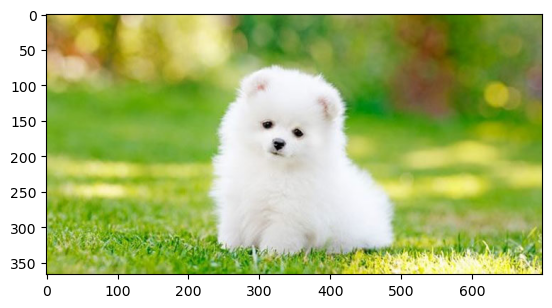



Your image was classified as a dog


In [11]:
my_image = cv2.imread("ta-con-cho.jpg")
run_svm(my_image)